<a href="https://colab.research.google.com/github/wangyiiing/MPA-MLF_Lab/blob/main/MPA_MLF_Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Exercise 1 - K-means from scratch

0. Load dataset

(60, 2)


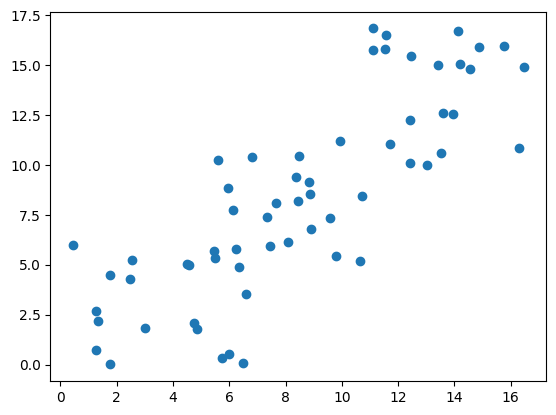

In [81]:
import matplotlib.pyplot as plt
import copy
import numpy as np
from numpy.linalg import norm
from sklearn.cluster import KMeans

loaded_points = np.load('sample_data/k_mean_points.npy')
print(loaded_points.shape)

plt.figure()
plt.scatter(loaded_points[:,0],loaded_points[:,1])


# 1. Specify number of clusters K

In [82]:
k = 3

2. initialize centroids

In [83]:
def initialize_clusters(points: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Initializes and returns k random centroids from the given dataset.

    :param points: Array of data points.
    :type: points ndarray with shape (n, 2)

    :param k_clusters: The number of clusters to form
    :type k_clusters: int


    :return: initial_clusters
    initial_clusters: Array of initialized centroids

    :rtype:
    initial_clusters: np.array (k_clusters, 2)
    :

    """

    ###################################
    # Write your own code here

    # Randomly choose k UNIQUE indices from the dataset
    #indices = np.random.choice(points.shape[0], size=k_clusters, replace=False)
    # Extract the corresponding points as centroids
    #return points[indices]
    initial_clusters = points[np.random.choice(points.shape[0], size=k_clusters, replace=False)]
    ###################################
    return initial_clusters




In [84]:
    ini_clusters = initialize_clusters(loaded_points, k)
    print(ini_clusters)

[[ 6.57977375  3.55640765]
 [ 9.9357077  11.20442432]
 [ 7.66355388  8.09644192]]


3. Calculate distance from centroids to all points in datasets.

3.1 Fistly, create a function to calculate distance from
one centroid to all points in the dataset

In [85]:
def calculate_metric(points: np.ndarray, centroid: np.ndarray) -> np.ndarray:
    """
    Calculates the distance metric between each point and a given centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroid: A single centroid
    :type centroid: ndarray with shape (1, 2)

    :return: distances_array
    distances_array: Array of distances from point to centroid

    :rtype:
    distances_array: ndarray with shape (n,1)
    :
    """

    ###################################
    # Write your own code here #

    # Subtract centroid from all points, compute norm (distance) row-wise
    #distances_array = np.square
    distances_array = norm(points - centroid, axis=1)
    ###################################

    return distances_array

In [86]:
metrics = calculate_metric(loaded_points, ini_clusters[1])
print(metrics)

[10.70046316  8.35191306  7.09343005  7.36201824  7.26518337 10.82130465
 10.47906082  8.22262552  9.48583169 13.5976417  13.85629936 11.641122
 11.63247196 11.61756878 12.13959279 12.45616052 10.16650436 10.57002965
 11.34833939  8.21483498  2.38852727  4.62003321  3.22596247  4.42859356
  3.8555891   2.31357515  5.13180771  2.87030309  3.84996592  3.36403848
  6.05199956  0.          5.77218311  6.54937997  5.84448785  4.54866423
  4.62608406  1.63414107  2.87586958  5.37957394  5.56821752  7.51023356
  4.94058317  5.14869532  3.90741954  6.93296772  4.22548679  2.71021869
  3.62455122  2.70862188  3.32339242  5.74213503  5.85645399  4.69052535
  6.37323361  4.90608115  6.82251861  7.53100168  5.76175345  1.78760843]


In [100]:
calculate_metric(loaded_points, ini_clusters[1]).shape

(60,)

3.2 Secondly, create a function to calculate distance between points and all centroids using function from 3.1

In [88]:

def compute_distances(points: np.ndarray, centroids_points: np.ndarray) -> np.ndarray:
    """
    Computes and returns the distance from each point to each centroid.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param centroids_points: A all centroid points
    :type centroids_points: ndarray with shape (k_clusters, 2)


    :return: distances_array
    distances_array: 2D array with distances of each point to each centroid.

    :rtype:
    distances_array: ndarray of shape (k_clusters, n)
    """
    ###################################
    # Write your own code here #

    distances_array = np.asarray([calculate_metric(points, centroid) for centroid in centroids_points])
    ###################################

    return distances_array

In [89]:
all_distances = compute_distances(loaded_points, ini_clusters)
print(all_distances.shape)
print (all_distances)

(3, 60)
[[ 2.47209265  0.          2.41661467  2.09321735  1.35408946  6.59172054
   2.34406733  2.54838612  4.38639828  6.01458748  5.97548411  3.31777844
   3.95430449  3.45073562  5.37242612  5.41400577  4.18518317  4.90349022
   3.0524402   2.48487101  6.10579812  3.89481514  6.84938128  6.77559447
   4.85189247  6.04970525  4.20893625  6.40954828  4.66760009  4.99534517
   4.37319695  8.35191306  3.71625746  2.27256166  2.51509733  3.97118786
   5.34595279  7.16897105  5.47882027  3.00224913 13.89814844 15.05633118
  13.27077239 13.33183725 11.43220298 15.17923816 11.62454303 10.48356024
   9.87843346  8.77205303  9.14019159 13.78694664 13.78294664 13.0030484
  12.15599145 13.24799728 14.88127236 15.44699816 14.04013371  9.079992  ]
 [10.70046316  8.35191306  7.09343005  7.36201824  7.26518337 10.82130465
  10.47906082  8.22262552  9.48583169 13.5976417  13.85629936 11.641122
  11.63247196 11.61756878 12.13959279 12.45616052 10.16650436 10.57002965
  11.34833939  8.21483498  2.388

4. Assign datapoints to the closest centroids

In [90]:
def assign_centroids(distances: np.ndarray) -> np.ndarray:
    """
    Assigns each point to the closest centroid based on the distances.

    Parameters:
    :param distances: 2D array with distances of each point to each centroid.
    :type distances: ndarray with shape (k_clusters, n)

    :return: assigned_clusters
    assigned_clusters: Array indicating the closest centroid for each data point.

    :rtype:
    assigned_centroids: ndarray with shape (1, n) and dtype = np.int32
    """

    ###################################
    # Write your own code here #

    assigned_centroids = np.argmin(distances, axis=0)
    ###################################

    return assigned_centroids

In [91]:
print(all_distances.shape)
assigned_centroids = assign_centroids(all_distances)
print(assigned_centroids)

(3, 60)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 1 2 2 2 1 2 0 2 2 2
 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


5. Calculate objective function

In [102]:
def calculate_objective(assigned_centroids: np.ndarray, distances: np.ndarray) -> np.ndarray:
    """
    Calculates and returns the objective function value for the clustering.

    Parameters:
    :param assigned_centroids: Array indicating the cluster assignment for each point.
    :type assigned_centroids: ndarray with shape (1, n) and and dtype = np.int64

    :param distances: 2D array with distances of each point to each centroid
    :type distances: ndarray with shape (k_clusters, n) and and dtype = np.float64

    :return: onjective_function_value
    onjective_function_value: Objective function value.

    :rtype:
    onjective_function_value: float32


    """
    ###################################
    # Write your own code here #
    # Get distances from each point to its assigned centroid
    point_distances = distances[assigned_centroids, np.arange(assigned_centroids.size)]
    # Calculate sum of squared distances
    objective_function_value = np.sum(point_distances ** 2)
    ###################################


    return objective_function_value

In [103]:
objective_function_value = calculate_objective(assigned_centroids, all_distances)
print(objective_function_value)

960.2098532674441


6. Compute new controids to the clusters by taking the average of the all data points that belong to each cluster

In [94]:
def calculate_new_centroids(points: np.ndarray, assigned_centroids: np.ndarray, k_clusters: int) -> np.ndarray:
    """
    Computes new centroids based on the current cluster assignments.

    Parameters:
    :param points: Array of n data points.
    :type points: ndarray with shape (n, 2)

    :param assigned_centroids: Array indicating the closest centroid for each data point.
    :type assigned_centroids: ndarray with shape (1, n) and dtype = np.int32


    :param k_clusters: Number of clusters.
    :type k_clusters: int


    :return: new_clusters
    new_clusters: new cluster points

    :rtype:
    new_clusters: ndarray with shape (1, n) and dtype = np.float32
    """

    ###################################
    # Write your own code here #

    new_clusters = []
    for cluster_id in range(k_clusters):
        j = np.where(assigned_centroids == cluster_id)
        point_sel = points[j]
        new_clusters.append(np.mean(point_sel, axis=0))

    new_clusters = np.asarray(new_clusters)
    ###################################

    return new_clusters

In [95]:
new_centroids = calculate_new_centroids(loaded_points, assigned_centroids, k)
print(new_centroids)


[[ 3.94687552  3.22672218]
 [12.92447019 13.4316236 ]
 [ 8.03038444  7.80437974]]


7. repeat steps 2-6. until there is no change in objective function or until the maximum n of iterations is reached

In [96]:
def fit(points: np.ndarray, k_clusters: int, n_of_oterations: int, error: float = 0.001) -> tuple:
    """
    Fits the k-means clustering model on the dataset.

    Parameters:
    :param points : Array of data points.
    :type points: ndarray with shape (n, 2) and dtype = np.float32

    :param k_clusters:  Number of clusters
    :type k_clusters: int

    :param n_of_oterations:  Maximum number of iterations
    :type n_of_oterations: int


    :param error: Threshold for convergence.
    :type error: float

    :return: centroid_points, last_objective
    centroid_points: final centroid points
    last_objective: final objective funtion

    :rtype:
    centroid_points: ndarray with shape (k_clusters, 2) and dtype = np.float32
    last_objective: float

    """

    ###################################
    # Write your own code here #

    centroid_points = initialize_clusters(points,k_clusters)
    last_objective = 10000

    for n in range(n_of_oterations):
        distances = compute_distances(points, centroid_points)
        cluster_belongs = np.argmin(distances, axis=0)
        objective = calculate_objective(cluster_belongs, distances)

        if abs(last_objective - objective) < error:
            break
        last_objective = objective
        centroid_points = calculate_new_centroids(points, cluster_belongs, k_clusters)


    ###################################

    return centroid_points, last_objective

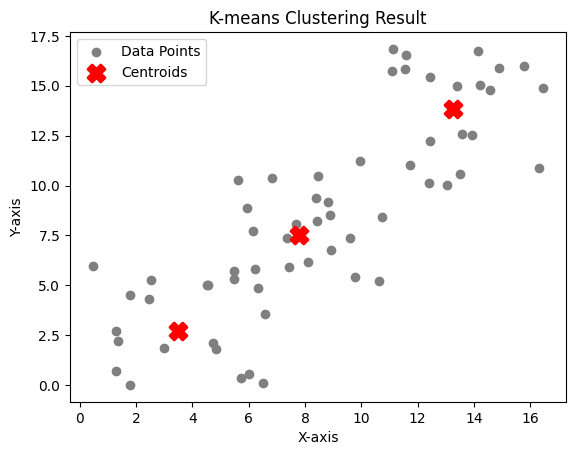

In [105]:
# After running the fit function to get centroids
centroids, objective_value = fit(loaded_points, k_clusters=3, n_of_oterations=100)

# Plot the original data points
plt.scatter(loaded_points[:, 0], loaded_points[:, 1], c='gray', label='Data Points')

# Plot the final centroids with a distinct marker and color
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=150, linewidths=2, label='Centroids')

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('K-means Clustering Result')
plt.show()

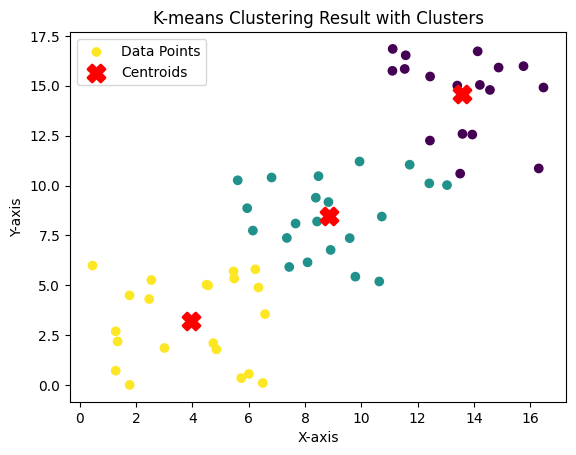

In [106]:
# Run the fit function to get centroids and objective value
centroids, objective_value = fit(loaded_points, k_clusters=3, n_of_oterations=100)

# Compute cluster assignments for all points using the final centroids
distances = compute_distances(loaded_points, centroids)
cluster_belongs = np.argmin(distances, axis=0)

# Plot data points colored by cluster
plt.scatter(
    loaded_points[:, 0],
    loaded_points[:, 1],
    c=cluster_belongs,
    cmap='viridis',
    label='Data Points'
)

# Plot centroids with a distinct marker
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    marker='X',
    s=150,
    linewidths=2,
    label='Centroids'
)

# Add labels and legend
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.title('K-means Clustering Result with Clusters')
plt.show()

##Exercise 2 - Implementing an Elbow Method


Implementing an elbow method is simple,

1.   Create a vector of possible k values
2.   Fit your data using different k values and save the objective function value
3.   Plot objective function values in terms of k values
4.   Find an elbow



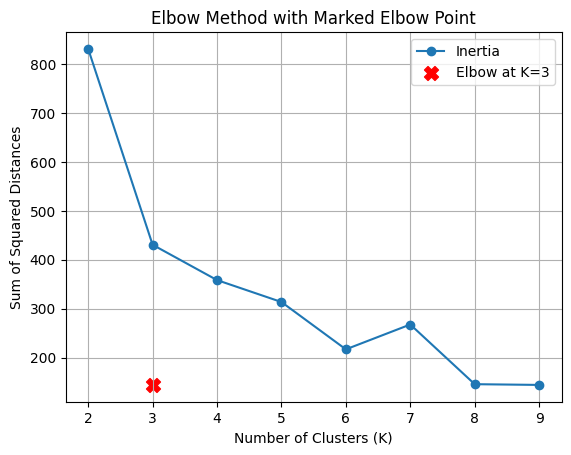

In [114]:
k_all = range(2, 10)
all_objective = []

# Compute objective values for each k
for k in k_all:
    # Fit K-means and retrieve the objective value
    _, obj_value = fit(
        points=loaded_points,
        k_clusters=k,
        n_of_oterations=100  # Note: Typo in parameter name matches the function definition
    )
    all_objective.append(obj_value)

# Calculate the differences between consecutive inertia values
differences = np.diff(all_objective)

# Normalize differences to [0, 1] for comparison
normalized_diff = (differences - np.min(differences)) / (np.max(differences) - np.min(differences))

# Find the "elbow" as the point where the rate of decrease slows significantly
elbow_index = np.argmax(normalized_diff < 0.1) + 1  # +1 adjusts for offset
elbow_k = k_all[elbow_index]

# Plot the elbow curve with a marker
plt.figure()
plt.plot(k_all, all_objective, marker='o', label='Inertia')
plt.scatter(
    elbow_k,
    all_objective[elbow_index - 2],  # Adjust index since k_all starts at 2
    color='red',
    s=100,
    marker='X',
    label=f'Elbow at K={elbow_k}'
)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method with Marked Elbow Point')
plt.xticks(k_all)
plt.grid(True)
plt.legend()
plt.show()

##Exercise 3 - Image Compression

In this exercise, the task would be to implement simple image compression using the k-means algorithm. You can use an image in the directory Data\. This time, we will use a library that implements k-means for us - sklearn https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html. To load the image you can use openCv or matplotlib (or anything else)

Steps

1. Firstly reshape your image to 2D array with shape (image.width*image.height, n_of_colour_channels)
2. Initialize the K_means algorithm, where K would be equal to the number of colours in the compressed image
3. check cluster centroids and convert them to integers - these are your new colours (kmeans.cluster_centers_ could be useful)
4. replace your 2D array colors with newly generated colors
5. reshape your 2D array to the original image shape

Tips:

it takes a couple of seconds to compress the attached image. For debugging purposes, you can use a custom smaller image
the implementation can be done in a single function

# 1. load image

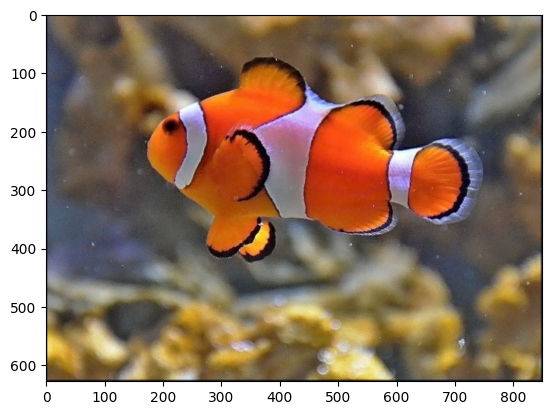

In [108]:
from matplotlib.image import imread
from sklearn.cluster import KMeans
import numpy as np
loaded_image = imread('sample_data/fish.jpg')

plt.imshow(loaded_image)
plt.show()

In [112]:
def compress_image(image: np.ndarray, number_of_colours: int) -> np.ndarray:
    """
    Compresses the given image by reducing the number of colours used in the image.

    This function applies k-means clustering to group the pixel colours of the image
    into 'number_of_colours' clusters. Each pixel's colour in the image is then replaced
    with the colour of the closest centroid of these clusters. This process effectively
    reduces the number of colours in the image, resulting in compression.

    Parameters:
    image (np.array): The original image is represented as a 3D numpy array
                      (height x width x color_channels).
    number_of_colours (int): The number of colours to reduce the image to.

    Returns:
    np.array: The compressed image as a numpy array in the same shape as the input.
    """
    h, w, c = image.shape
    image_2d = image.reshape(-1, c)

    # Convert float images (0-1) to 0-255 range if needed
    if np.issubdtype(image_2d.dtype, np.floating):
        image_2d = (image_2d * 255).astype(np.uint8)

    # Apply K-means clustering
    kmeans = KMeans(n_clusters=number_of_colours, random_state=0)
    kmeans.fit(image_2d)

    # Get integer centroids (new colors)
    centroids = kmeans.cluster_centers_.round().astype(np.uint8)

    # Replace pixels with centroid colors
    compressed_2d = centroids[kmeans.labels_]

    # Reshape back to original dimensions
    compressed_image = compressed_2d.reshape(h, w, c)

    return compressed_image

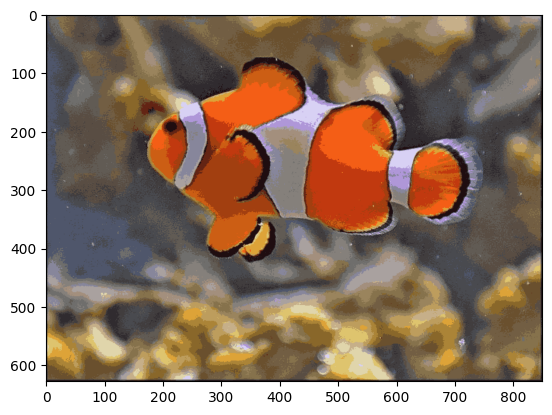

In [113]:
img = compress_image(loaded_image, 30)

plt.figure()
plt.imshow(img)
plt.show()